In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [256]:
m = 100000
np.random.seed(666)
x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)
y.shape

(100000,)

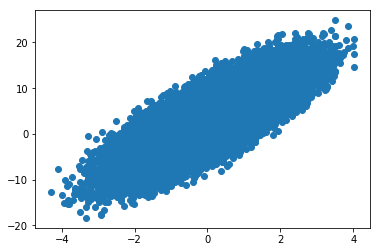

In [257]:
plt.scatter(X,y)
plt.show()

In [258]:
def dJ_theta_stochastic(x_i,y_i,theta):
    return x_i.T.dot( x_i.dot(theta) - y_i )*2.


In [293]:
def stochastic_gradient_descent(X,y,theta):
    
    iters_of_number = len(X)
    #shuffle X和y  （注意X_y之间的顺序有关系！）
    X_y = np.hstack([X,y.reshape((-1,1))])
    np.random.shuffle(X_y)
    X = X_y[:,0:-1]
    y = X_y[:,-1]
    #确保 步长（梯度）随着算法的运行减少的函数
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    #主要算法 因为X y 是随机序列 所以顺序取出来X y做随机梯度下降就可以
    for i in range(iters_of_number):
        x_i = X[i]
        y_i = y[i]
        #计算梯度
        grad = dJ_theta_stochastic(x_i,y_i,theta)
        #更新theta
        theta = theta - learning_rate(iters_of_number) * grad
        
    return theta

In [300]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
# X_y = np.hstack([X_b,y.reshape((-1,1))])
stochastic_gradient_descent(X_b,y,initial_theta)

Wall time: 804 ms


### 随机梯度下降算法

In [295]:

def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [296]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

Wall time: 391 ms


In [297]:
theta

array([ 3.01487675,  3.96045621])

In [298]:
from LinearRegression import LinearRegression

In [299]:
LR = LinearRegression().fit_gd(X,y)

In [289]:
LR.coef_

array([ 4.00684163])

In [290]:
LR.intercept_

3.0054532893640005